In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing Data

In [3]:
with_mask = np.load("Data/withoutmask.npy")

In [4]:
with_mask.shape

(201, 50, 50, 3)

In [5]:
without_mask = np.load("Data/withmask.npy")

In [6]:
without_mask.shape


(201, 50, 50, 3)

In [7]:
with_mask = with_mask.reshape(201,50*50*3)
without_mask = without_mask.reshape(201,50*50*3)

In [8]:
without_mask = without_mask[:200,:]
without_mask.shape

(200, 7500)

In [9]:
with_mask = with_mask[:200,:]
with_mask.shape

(200, 7500)

In [10]:
#combining both datas
x = np.r_[with_mask,without_mask]
x.shape

(400, 7500)

In [11]:
labels = np.zeros(x.shape[0])
#assigning 1.0 value to without_mask datas
labels[200:] = 1.0

In [12]:
#assign names
names = {0:'mask',1:'no mask'}

# Input split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,labels,test_size=0.25)

In [15]:
x_train.shape

(300, 7500)

In [16]:
pca = PCA(n_components =3)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

# Model Training

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
#initializing model
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [19]:
pred = svm.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.95


# Testing

In [21]:
Haar_data = cv2.CascadeClassifier("Data/frontalface_harrcascade.xml")

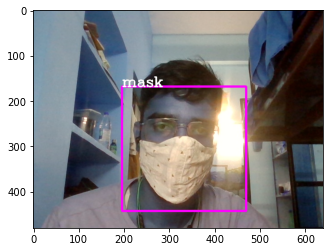

In [24]:
capture = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:                                                         #flag == True if camera is working
        faces = Haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
            face = img[ y:y+h, x:x+w, : ]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = svm.predict(face)[0]
            n = names[int(pred)]
            cv2.putText(img, n , (x,y), font, 1,(255,255,255),2)
            
        cv2.imshow('output',img)
        plt.imshow(img)
        if cv2.waitKey(0) == 27 : #Escape Key
            break
capture.release()
cv2.destroyAllWindows()

# END